In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy
import optuna

In [3]:
Data_file = pd.read_csv("/projects/kaad8904/CNN_Data/Data_Weird.txt",delimiter = "\t")
Pred = Data_file["Pred"]
Err = Data_file["Error"]
Truth = Data_file["Truth"]
Data_file

,Pred,Error,Truth
0,14.123,-1.367,14.482
1,14.340,-1.058,14.470
2,2.176,1.591,14.326
3,14.650,-1.104,14.454
4,14.443,-1.081,14.425
...,...,...,...
3472,13.184,-0.846,12.905
3473,13.188,-0.847,12.881
3474,13.182,-0.847,12.915
3475,12.556,-1.606,12.859


In [5]:
mask = Pred > 4
print(len(Pred[mask]))
for i,k in zip(Pred[mask],Truth[mask]):
    print(f"Pred = {i},\tTruth = {k}")

2768
Pred = 14.123,	Truth = 14.482
Pred = 14.34,	Truth = 14.47
Pred = 14.65,	Truth = 14.454
Pred = 14.443,	Truth = 14.425
Pred = 14.374,	Truth = 14.446
Pred = 14.383,	Truth = 14.416
Pred = 14.536,	Truth = 14.364
Pred = 14.418,	Truth = 14.401
Pred = 14.399,	Truth = 14.336
Pred = 14.111,	Truth = 14.188
Pred = 14.452,	Truth = 14.267
Pred = 13.883,	Truth = 14.201
Pred = 14.232,	Truth = 14.415
Pred = 14.63,	Truth = 14.429
Pred = 14.111,	Truth = 14.445
Pred = 14.147,	Truth = 14.475
Pred = 14.348,	Truth = 14.32
Pred = 14.347,	Truth = 14.437
Pred = 14.187,	Truth = 14.447
Pred = 13.764,	Truth = 13.966
Pred = 14.351,	Truth = 14.37
Pred = 14.259,	Truth = 14.181
Pred = 14.216,	Truth = 14.262
Pred = 14.236,	Truth = 14.164
Pred = 14.292,	Truth = 14.421
Pred = 14.277,	Truth = 14.368
Pred = 14.213,	Truth = 14.279
Pred = 14.133,	Truth = 14.089
Pred = 14.218,	Truth = 14.39
Pred = 14.12,	Truth = 14.366
Pred = 14.053,	Truth = 14.329
Pred = 14.193,	Truth = 14.194
Pred = 14.409,	Truth = 14.081
Pred = 14.008

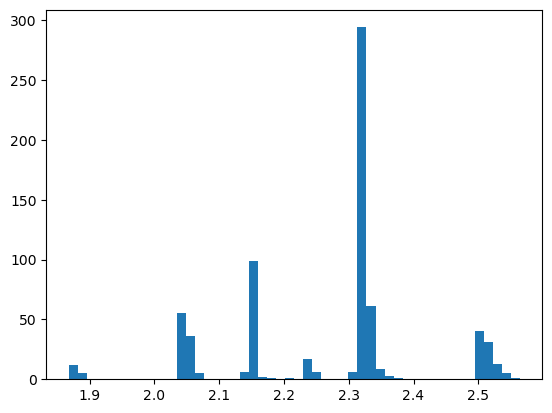

In [4]:
plt.hist(Pred[mask],bins = 50);

<Axes: xlabel='Pred', ylabel='Truth'>

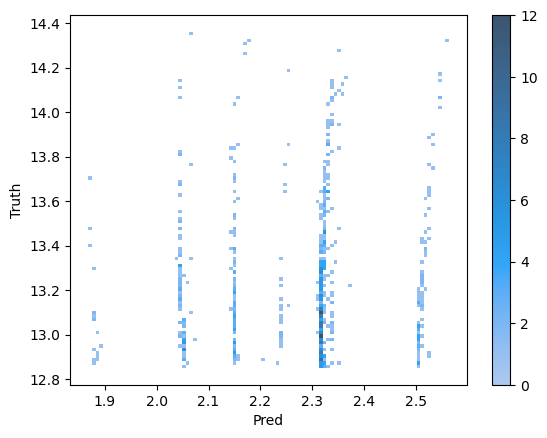

In [5]:
fig, ax = plt.subplots()
# plt.plot(Pred[mask],Truth[mask],"b.")
# plt.xlabel("Predicted mass")
# plt.ylabel("Truth mass")
sns.histplot(
    x=Pred[mask],y=Truth[mask],
    ax=ax,cbar=True,bins = 100
)

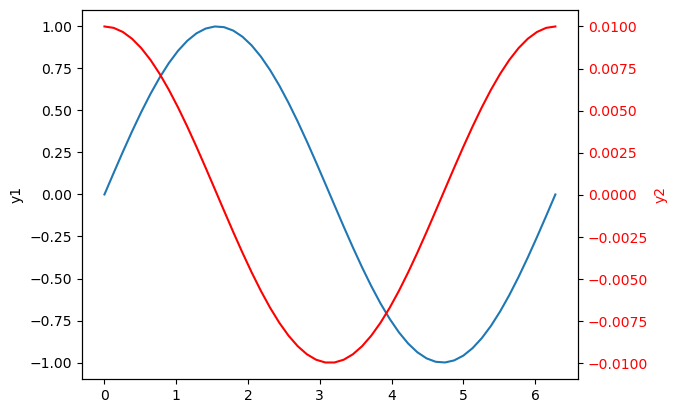

In [6]:
x = np.linspace(0, 2*np.pi)
y1 = np.sin(x);
y2 = 0.01 * np.cos(x);

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(x, y1)
ax1.set_ylabel('y1')

ax2 = ax1.twinx()
ax2.plot(x, y2, 'r-')
ax2.set_ylabel('y2', color = 'r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')

In [7]:
y = np.array([12,634,12,641,3,654,123])
y = (y-np.min(y))/(np.max(y)-np.min(y))
y

array([0.01382488, 0.96927803, 0.01382488, 0.98003072, 0.        ,
       1.        , 0.1843318 ])

In [2]:
x = np.zeros((15,34,67))
x.shape

(15, 34, 67)

In [13]:
y = list(x.shape[:])
y.insert(0,1)
y = tuple(y)
y

(1, 15, 34, 67)

In [19]:
x = "1_channel"
check_numerical = x[0].isnumeric()
print(check_numerical)
if(not check_numerical):
    print("no")
num_channels = int(x[0])
num_channels

True


1

<Axes: xlabel='Pred', ylabel='Truth'>

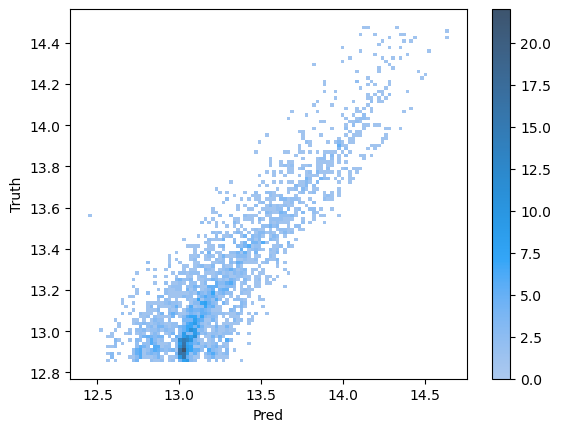

In [6]:
fig, ax = plt.subplots()
# plt.plot(Pred[mask],Truth[mask],"b.")
# plt.xlabel("Predicted mass")
# plt.ylabel("Truth mass")
sns.histplot(
    x=Pred[mask],y=Truth[mask],
    ax=ax,cbar=True,bins = 100
)

In [7]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(Pred[mask], Truth[mask])

In [14]:
print(f'slope = {slope},intercept = {intercept},r_value = {r_value},p_value = {p_value},std_err = {std_err},coefficient of correlation = {r_value**2}')

slope = 0.8301981635700146,intercept = 2.2347004988008177,r_value = 0.8850917293880947,p_value = 0.0,std_err = 0.008300596180261783,coefficient of correlation = 0.7833873694312082


<ErrorbarContainer object of 3 artists>

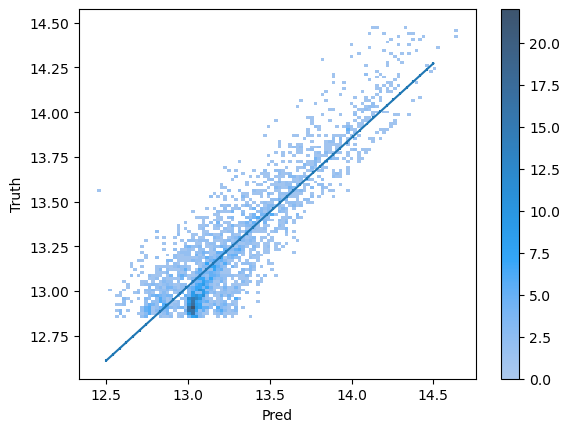

In [13]:
fig, ax = plt.subplots()
sns.histplot(
    x=Pred[mask],y=Truth[mask],
    ax=ax,cbar=True,bins = 100
)
x = np.linspace(12.5,14.5)
ax.errorbar(x,slope*x+intercept,yerr=std_err)

## Optuna Section

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy
import optuna

In [13]:
root_storage = '/projects/kaad8904/CNN_Light/databases/'
# root_storage = '/projects/beop5934/CNN_Light/databases/'
root_storage_db = 'sqlite:///'+root_storage
studies = ['100_0.2-0.4_lem_0.4-0.6_lem_0.73-1.1_lem_1.43-2.0_lem_Fe_XVII_O_VII_O_VIII_M500c_f_gas_R500c_Log_Z_Loss',\
           '100_H1_M500c_f_gas_R500c_Log_Z_Loss','100_H1_H1_vel_H1_disp_M500c_f_gas_R500c_Log_Z_Loss',\
          '100_0.2-0.4_lem_0.4-0.6_lem_0.73-1.1_lem_1.43-2.0_lem_Fe_XVII_O_VII_O_VIII_H1_H1_vel_H1_disp_M500c_f_gas_R500c_f_cool_R500c_Loss',\
          '100_0.2-0.4_lem_0.4-0.6_lem_0.73-1.1_lem_1.43-2.0_lem_Fe_XVII_O_VII_O_VIII_H1_H1_vel_H1_disp_M500c_f_gas_R500c_f_cool_R500c_Scatter']

In [30]:
study_name = studies[4]
storage_name_db = root_storage_db+study_name+ ".db"
study = optuna.load_study(study_name = study_name, storage=storage_name_db)

In [31]:
dataframe = study.trials_dataframe()
# loss = dataframe['value']
scatter = dataframe['value']
lr = dataframe['params_lr']
dr = dataframe['params_dr']
wd = dataframe['params_wd']
hidden = dataframe['params_hidden']
trial_number = dataframe['number']

In [32]:
dataframe

,number,value,datetime_start,datetime_complete,duration,params_dr,params_hidden,params_lr,params_wd,state
0,0,0.208534,2024-08-22 13:28:54.230849,2024-08-22 15:48:59.385862,0 days 02:20:05.155013,0.031509,6,0.000184,0.020054,COMPLETE
1,1,0.129651,2024-08-22 15:48:59.546458,2024-08-22 17:44:27.725507,0 days 01:55:28.179049,0.077854,5,0.000301,0.038827,COMPLETE
2,2,7.294103,2024-08-22 17:44:27.883025,2024-08-22 19:05:44.891229,0 days 01:21:17.008204,0.006347,4,0.002592,0.068006,COMPLETE
3,3,0.534271,2024-08-22 19:05:45.055045,2024-08-22 20:25:51.140995,0 days 01:20:06.085950,0.131646,4,0.000223,0.005566,COMPLETE
4,4,0.081395,2024-08-22 20:25:51.312301,2024-08-22 21:44:28.751546,0 days 01:18:37.439245,0.193509,4,0.000022,0.030828,COMPLETE
...,...,...,...,...,...,...,...,...,...,...
65,65,0.134502,2024-09-12 11:43:38.406750,2024-09-12 12:46:34.535828,0 days 01:02:56.129078,0.038728,3,0.000223,0.002859,COMPLETE
66,66,0.098307,2024-09-12 12:46:36.247181,2024-09-12 13:49:16.117931,0 days 01:02:39.870750,0.077881,3,0.000170,0.002215,COMPLETE
67,67,0.073186,2024-09-12 13:49:18.464786,2024-09-12 14:49:17.246390,0 days 00:59:58.781604,0.010889,3,0.000078,0.002548,COMPLETE
68,68,0.063603,2024-09-12 14:49:28.920607,2024-09-12 15:51:34.758122,0 days 01:02:05.837515,0.023250,3,0.000119,0.003316,COMPLETE


In [34]:
print(scatter)

0     0.208534
1     0.129651
2     7.294103
3     0.534271
4     0.081395
        ...   
65    0.134502
66    0.098307
67    0.073186
68    0.063603
69    0.456786
Name: value, Length: 70, dtype: float64


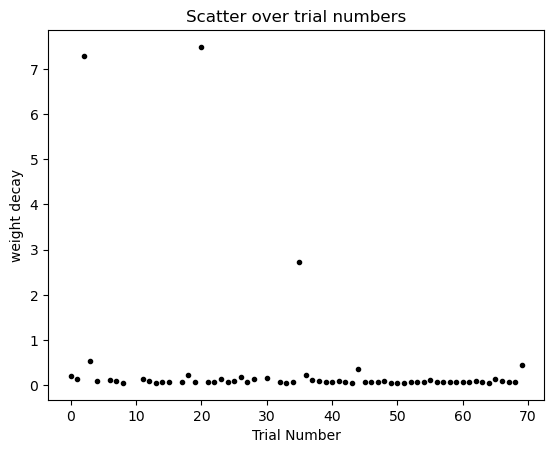

In [35]:
mask = loss < -1
colors = plt.get_cmap('viridis')
# sc = plt.scatter(lr[mask],wd[mask],s=4*(trial_number[mask]+1),c=loss[mask],marker = '^',cmap=colors)
# sc = plt.scatter(lr,wd,s=4*(trial_number+1),c=loss,marker='^',cmap=colors)
sc = plt.scatter(trial_number,scatter,marker='.',color='k')
# plt.colorbar(sc,label='loss')
# sc2 = plt.scatter(lr,wd,s=(trial_number+1),c=r_value,marker = 'X',cmap=colors)
# plt.colorbar(sc2,label='r_value',orientation='horizontal')
# plt.xscale('log')
# plt.yscale('log')
# plt.xlabel('learning rate')
plt.xlabel("Trial Number")
plt.ylabel("Scatter")
# plt.ylabel('hidden')
plt.ylabel("weight decay")
# plt.title('parameter space, size = trial number');
plt.title("Scatter over trial numbers");

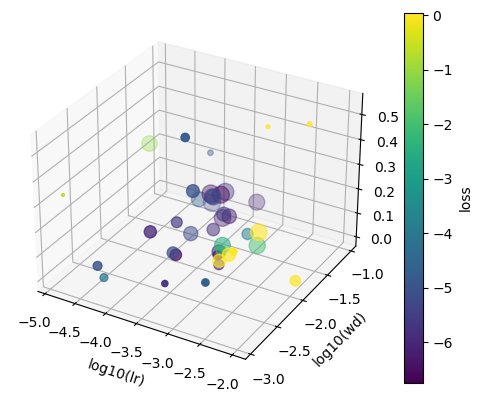

In [59]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
p = ax.scatter(np.log10(lr), np.log10(wd), dr, s=4*(trial_number+1), c=loss, cmap=colors)
ax.set_xlabel('log10(lr)')
ax.set_ylabel('log10(wd)')
ax.set_zlabel('dropout')
# ax.xaxis.set_scale('log')
# ax.yaxis.set_scale('log')
fig.colorbar(p,label='loss');

### Plotting Halos

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Naomi_Code.accuracy import *
from Naomi_Code.data_cuts import *

In [8]:
# Necessary if the chosen Trial does not include Mass as a parameter

Names = Names = ["ID","M500c","f_gas_R500c","a_form","conc_200c","shape","Gamma_R500C"\
             ,"Gamma_vir","Log_T","Log_Z","OFe","NeFe","CO","axis placeholder"\
             ,"M500c_","M200c","f_gas_0.5R200c","f_gas_0.7R200c","f_gas_R200c","f_gas_2R200c"]
Dataset_overlord = pd.read_csv("/pl/active/CASA/beop5934/halos/TNG300/Params_Groups_TNG300_z=0.00.ascii_ID_fgas", delimiter = "\s+",names = Names)
DO_new = pd.DataFrame(np.repeat(Dataset_overlord.values,3,axis=0))
DO_new.columns = Dataset_overlord.columns
Names_100 = ["ID","M200c","f_gas_R500c", "a_form","conc_200c","shape","Log_M_star","M500c",
                 "f_gas_0.5R200c","f_gas_0.7R200c","f_gas_R200c","f_gas_2R200c",
                 "Log_Z_50","Log_Z_100","Log_Z_200","OFe_50","OFe_100","OFe_200","f_cool_R500c"]
Dataset_overlord_100 = pd.read_csv("/pl/active/CASA/beop5934/halos/TNG100/Params_TNG100_z=0.00.multiradii.ascii_ID_fgas", delimiter = "\s+",names = Names_100)
DO_100_new = pd.DataFrame(np.repeat(Dataset_overlord_100.values,3,axis=0))
DO_100_new.columns = Dataset_overlord_100.columns

In [9]:
DO_100_new

,ID,M200c,f_gas_R500c,a_form,conc_200c,shape,Log_M_star,M500c,f_gas_0.5R200c,f_gas_0.7R200c,f_gas_R200c,f_gas_2R200c,Log_Z_50,Log_Z_100,Log_Z_200,OFe_50,OFe_100,OFe_200,f_cool_R500c
0,12.0,13.931,0.070,0.845,3.426,0.686,11.573,13.690,0.067,0.082,0.105,0.126,-1.901,-2.064,-2.229,0.098,0.120,0.162,0.037
1,12.0,13.931,0.070,0.845,3.426,0.686,11.573,13.690,0.067,0.082,0.105,0.126,-1.901,-2.064,-2.229,0.098,0.120,0.162,0.037
2,12.0,13.931,0.070,0.845,3.426,0.686,11.573,13.690,0.067,0.082,0.105,0.126,-1.901,-2.064,-2.229,0.098,0.120,0.162,0.037
3,13.0,13.712,0.074,0.658,6.991,0.820,11.744,13.494,0.068,0.080,0.095,0.127,-1.811,-1.937,-2.068,0.176,0.181,0.189,0.041
4,13.0,13.712,0.074,0.658,6.991,0.820,11.744,13.494,0.068,0.080,0.095,0.127,-1.811,-1.937,-2.068,0.176,0.181,0.189,0.041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10693,4372.0,11.713,0.008,0.275,14.287,0.821,10.088,11.633,0.007,0.008,0.010,0.029,-1.960,-2.011,-2.055,-0.185,-0.155,-0.103,0.532
10694,4372.0,11.713,0.008,0.275,14.287,0.821,10.088,11.633,0.007,0.008,0.010,0.029,-1.960,-2.011,-2.055,-0.185,-0.155,-0.103,0.532
10695,4397.0,11.721,0.008,0.290,13.850,0.849,10.131,11.638,0.006,0.009,0.014,0.055,-2.077,-2.213,-2.222,-0.028,0.099,0.134,0.315
10696,4397.0,11.721,0.008,0.290,13.850,0.849,10.131,11.638,0.006,0.009,0.014,0.055,-2.077,-2.213,-2.222,-0.028,0.099,0.134,0.315


In [10]:
f = open('CNN_Light_Alpine_inputs.txt')
input_array = f.readlines()
output_array = []
n_empt_lin = 0
for i in range(len(input_array)):
    line = input_array[i].split()
    if(len(line) > 0):
        output_array.append(line)
        
for i in range(len(output_array)):
    print(output_array[i])

['200', '3_18_2024', '1_channel', '100', 'H1']
['201', '3_18_2024', '2_channel', '100', 'H1', 'H1_vel']
['202', '3_18_2024', '3_channel', '100', 'H1', 'H1_vel', 'H1_disp']
['203', '3_18_2024', '1_channel', '100', '0.2-0.4']
['204', '3_18_2024', '2_channel', '100', '0.2-0.4', 'H1']
['205', '3_18_2024', '4_channel', '100', '0.2-0.4', 'H1', 'H1_vel', 'H1_disp']
['206', '3_18_2024', '1_channel', '100', '0.4-0.6']
['207', '3_18_2024', '2_channel', '100', '0.4-0.6', 'H1']
['208', '3_18_2024', '4_channel', '100', '0.4-0.6', 'H1', 'H1_vel', 'H1_disp']
['209', '3_18_2024', '1_channel', '100', '0.73-1.1']
['210', '3_18_2024', '2_channel', '100', '0.73-1.1', 'H1']
['211', '3_18_2024', '4_channel', '100', '0.73-1.1', 'H1', 'H1_vel', 'H1_disp']
['212', '3_18_2024', '1_channel', '100', '1.43-2.0']
['213', '3_18_2024', '2_channel', '100', '1.43-2.0', 'H1']
['214', '3_18_2024', '4_channel', '100', '1.43-2.0', 'H1', 'H1_vel', 'H1_disp']
['215', '3_18_2024', '1_channel', '100', 'Fe_XVII']
['216', '3_18_

In [11]:
trial_number = '263' # To be replaced with an input argument
tipe = 'Scatter' # to be replaced with an input argument
index = -1
channels = []
params = []
for i in range(len(output_array)):
    if(int(output_array[i][0]) == int(trial_number)):
        index = i

if(index == -1):
    sys.exit('Trial Number not found, try again')
else:
    date = output_array[index][1]
    num_channels = int(output_array[index][2])
    sim = output_array[index][3]
    for i in range(num_channels):
        channels.append(output_array[index][4+i])
    num_params = int(output_array[index][4+num_channels])
    for i in range(num_params):
        params.append(output_array[index][4+num_channels+1+i])
        
data_dir = "/projects/kaad8904/CNN_Light/results/"
df = pd.read_csv(data_dir+"CNN_Light_Trial_"+trial_number+"_data_"+tipe+".csv")

In [12]:
df

,Unnamed: 0,M500c_Pred,M500c_Error,M500c_Truth,f_gas_R500c_Pred,f_gas_R500c_Error,f_gas_R500c_Truth,Log_Z_Pred,Log_Z_Error,Log_Z_Truth,ID
0,0,13.434576,-0.534593,13.690,0.066674,-5.826699,0.070,-2.111779,-1.630640,-2.064,12_x
1,1,13.147959,-0.185237,13.690,0.095084,-5.433347,0.070,-2.224051,-1.341539,-2.064,12_y
2,2,13.053168,-0.595986,13.690,0.063708,-5.826377,0.070,-2.192681,-1.632387,-2.064,12_z
3,3,13.350832,-0.365739,13.494,0.076285,-5.657001,0.074,-2.115711,-1.532641,-1.937,13_x
4,4,13.510229,-0.364827,13.494,0.086072,-5.665862,0.074,-2.065580,-1.567085,-1.937,13_y
...,...,...,...,...,...,...,...,...,...,...,...
10693,10693,11.893229,-0.695772,11.633,0.009931,-5.890815,0.008,-2.211533,-1.532191,-2.011,4372_y
10694,10694,11.845305,-0.685640,11.633,0.010572,-5.879990,0.008,-2.169985,-1.529697,-2.011,4372_z
10695,10695,11.850060,-0.633760,11.638,0.013812,-5.830554,0.008,-2.279010,-1.484563,-2.213,4397_x
10696,10696,11.968188,-0.657427,11.638,0.005102,-5.896180,0.008,-2.256607,-1.503059,-2.213,4397_y


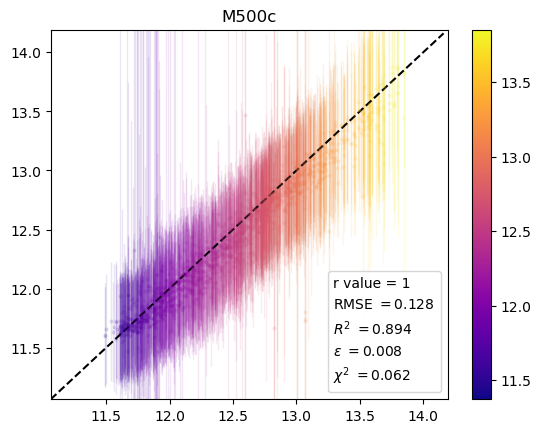

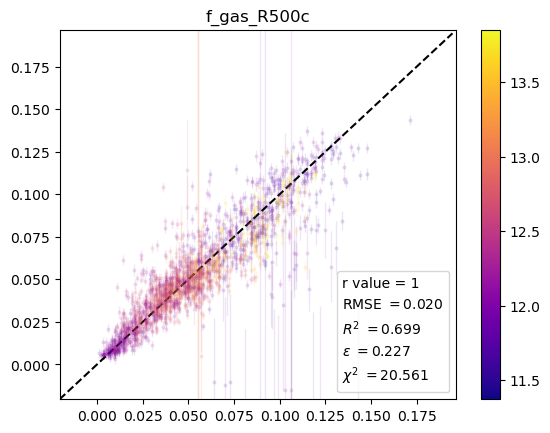

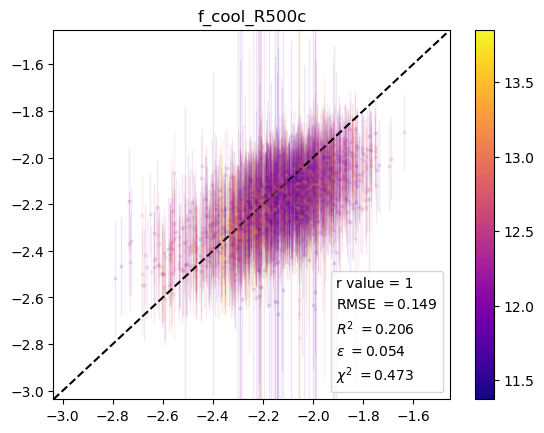

In [14]:
cm = plt.get_cmap("plasma")
for i in range(num_params):
    fig = plt.figure()
    ax = fig.add_subplot()
    
    x = df[df.keys()[3+i*3]].values
    y = df[df.keys()[1+i*3]].values
    y_err = df[df.keys()[2+i*3]].values
    maxs = np.max(x)
    mins = np.min(x)
    window_range = (maxs-mins)*0.25/2
    
    RMSE = rmse(x, y)
    R2 = r2_score(x,y)
    RM_err = rel_mean_err(x,y)
    chi2 = chi_squared(x,y,np.exp(y_err))
    
    RMSE = np.nanmean(RMSE)
    R2 = np.nanmean(R2)
    RM_err = np.nanmean(RM_err)
    chi2 = np.nanmean(chi2)
    
    if(sim == "300"):
        for j in range(len(x)):
            if(j%trim_mhalo_data(DO_new["M500c"][j]) != 0): continue
            ax.errorbar(x[j],y[j],np.exp(y_err[j]),linestyle='None', lw=1, fmt='o', ms=2, elinewidth=1, capsize=0, alpha=0.1, c=cm((DO_new["M500c"][j]-np.min(DO_new["M500c"]))/(np.max(DO_new["M500c"])-np.min(DO_new["M500c"]))))
        dummydata = ax.scatter([np.min(DO_new["M500c"]),np.max(DO_new["M500c"])], [np.min(DO_new["M500c"]),np.max(DO_new["M500c"])], c=[np.min(DO_new["M500c"]),np.max(DO_new["M500c"])], cmap='plasma',s=0.001)
    elif(sim == "100"):
        for j in range(len(x)):
            if(j%trim_mhalo_data(DO_100_new["M500c"][j]) != 0): continue
            ax.errorbar(x[j],y[j],np.exp(y_err[j]),linestyle='None', lw=1, fmt='o', ms=2, elinewidth=1, capsize=0, alpha=0.1, c=cm((DO_100_new["M500c"][j]-np.min(DO_100_new["M500c"]))/(np.max(DO_100_new["M500c"])-np.min(DO_100_new["M500c"]))))
        dummydata = ax.scatter([np.min(DO_100_new["M500c"]),np.max(DO_100_new["M500c"])], [np.min(DO_100_new["M500c"]),np.max(DO_100_new["M500c"])], c=[np.min(DO_100_new["M500c"]),np.max(DO_100_new["M500c"])], cmap='plasma',s=0.001)
    ax.plot([mins-window_range,maxs+window_range],[mins-window_range,maxs+window_range],'k--',label="r value = 1")
    fig.colorbar(dummydata)
    ax.title.set_text(params[i])
    ax.set_xlim(mins-window_range,maxs+window_range*1.1)
    ax.set_ylim(mins-window_range,maxs+window_range*1.1)
    line_RMSE, = ax.plot([],[],label=r'$\rm{RMSE}\ $'+ r'$ = {:.3f}$'.format(RMSE), color='none', markerfacecolor='none')
    line_R2, = ax.plot([],[],label=r'$R^2\ $'+ r'$ = {:.3f}$'.format(R2), color='none', markerfacecolor='none')
    line_RMerr, = ax.plot([],[],label=r'$\epsilon\ $'+ r'$ = {:.3f}$'.format(RM_err), color='none', markerfacecolor='none')
    line_chi2, = ax.plot([],[],label=r'$\chi^2\ $'+ r'$ = {:.3f}$'.format(chi2), color='none', markerfacecolor='none')
    ax.legend(handlelength=0, handletextpad=0, loc='lower right')
    plt.show()

Add statistics and Data cuts

Ask Matt about errorbars and nans